Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

Dataset:

https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb

Data Dictionary:

There are two csv files given

train_1.csv: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

The page name contains data in this format:

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

Exog_Campaign_eng: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

Concepts Tested:

Exploratory data analysis

Time Series forecasting- ARIMA, SARIMAX, and Prophet

What does “good” look like?

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset

Checking null values and understanding their reason.

Understanding the page name format and splitting it to get different information.

Separating different values from it like title, language, access type, and access origin.

Visualizing the data and getting inferences from them

Converting the data to a format that can be fed to the Arima model (Pivoting etc)

Checking if the data is stationary

Dickey-Fuller test

Trying different methods for stationarity.

Decomposition of series.

Differencing the series.

Plotting the ACF and PACF plots

Give insights about the characteristics of the time series.

Modeling

Creating and training the Arima model

Getting the exogenous variable and using it to train a sarimax model

Use facebook prophet for forecasting

Finding a way(grid search / etc) to find the best params for at least 1 modeling approach.

Defining functions for all of the tasks.

Comparing results for all languages and creating inferences and recommendations from them

The MAPE for previous batches has been in the range of 4-8%

Evaluation Criteria (100 points)

Importing the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset (10 points)

Exploratory Data Analysis (20 points)

Separating the data

Analyzing and visualizing the data

Getting inferences

Checking stationarity (20 points)

Formatting the data for the model

Dickey fuller test

Decomposition

Differencing

Creating model training and forecasting with ARIMA, SARIMAX (20 points)

ACF and PACF plot.

Training the model.

Forecasting for different languages/regions.

Plotting the final results

Forecasting with (20 points)

Facebook prophet
Creating a pipeline for working with multiple series (10 points)

Questionnaire:

Defining the problem statements and where can this and modifications of this be used?

Write 3 inferences you made from the data visualizations

What does the decomposition of series do?

What level of differencing gave you a stationary series?

Difference between arima, sarima & sarimax.

Compare the number of views in different languages

What other methods other than grid search would be suitable to get the model for all languages?

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
import warnings

In [99]:
warnings.filterwarnings("ignore")

In [100]:
# Mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Download the file to your Colab runtime
!gdown --id 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

# Read the file into a pandas dataframe
import pandas as pd
df = pd.read_csv('train_1.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl 



In [101]:
# df = pd.read_csv('train_1.csv')

In [102]:
exog_df = pd.read_csv('Exog_Campaign_eng .csv')

In [103]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [104]:
df.shape

(66534, 551)

In [105]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


##### Interpretation of Null Values

In [106]:
df.isna().sum()

Page              0
2015-07-01    10607
2015-07-02    10679
2015-07-03    10602
2015-07-04    10645
              ...  
2016-12-27     1602
2016-12-28     1576
2016-12-29     1620
2016-12-30     1461
2016-12-31     1607
Length: 551, dtype: int64

In [107]:
df_T = df.T

In [108]:
df_T.head()

,0,1,2,3,4,5,6,7,8,9,...,66524,66525,66526,66527,66528,66529,66530,66531,66532,66533
Page,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,ASCII_zh.wikipedia.org_all-access_spider,...,Raclette_de.wikipedia.org_desktop_all-agents,Rafael_Nadal_de.wikipedia.org_desktop_all-agents,Rainer_Maria_Rilke_de.wikipedia.org_desktop_al...,Rainer_Niemeyer_de.wikipedia.org_desktop_all-a...,Raknehaugen_de.wikipedia.org_desktop_all-agents,Ramadan_de.wikipedia.org_desktop_all-agents,Rammstein_de.wikipedia.org_desktop_all-agents,Ranavalona_III._de.wikipedia.org_desktop_all-a...,Rapa_das_Bestas_de.wikipedia.org_desktop_all-a...,Rauhnacht_de.wikipedia.org_desktop_all-agents
2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,6.0,...,55.0,572.0,416.0,2.0,NaN,2309.0,1202.0,8.0,NaN,38.0
2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,3.0,...,48.0,2331.0,427.0,4.0,NaN,2555.0,1153.0,6.0,NaN,44.0
2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,5.0,...,44.0,3445.0,307.0,5.0,NaN,2081.0,1189.0,0.0,NaN,23.0
2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,12.0,...,33.0,1034.0,265.0,2.0,NaN,1204.0,919.0,8.0,NaN,24.0


In [109]:
def get_lang(x):
    if '.wikipedia.org_' in x:
        return x.split('.wikipedia.org_')[0][-2:]
    elif '.wikimedia.org_' in x:
        return x.split('.wikimedia.org_')[0][-7:]
    else:
        return None

df['lang'] = df['Page'].apply(get_lang)

In [110]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


In [111]:
df.shape

(66534, 552)

In [112]:
# Group the data by language and sum the timeseries data
lang_grouped = df.groupby('lang').sum()

# Transpose the dataframe to make the dates the index and the languages the columns
lang_df = lang_grouped.transpose()

# Convert the index to a datetime index
lang_df.index = pd.to_datetime(lang_df.index)

# Set the index name to 'date'
lang_df.index.name = 'date'

In [113]:
lang_df.index.min(),lang_df.index.max()

(Timestamp('2015-07-01 00:00:00'), Timestamp('2016-12-31 00:00:00'))

In [114]:
lang_df.shape

(550, 7)

In [115]:
exog_df.shape

(550, 1)

In [116]:
lang_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2015-07-01 to 2016-12-31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   commons  550 non-null    float64
 1   de       550 non-null    float64
 2   en       550 non-null    float64
 3   fr       550 non-null    float64
 4   ja       550 non-null    float64
 5   ru       550 non-null    float64
 6   zh       550 non-null    float64
dtypes: float64(7)
memory usage: 34.4 KB


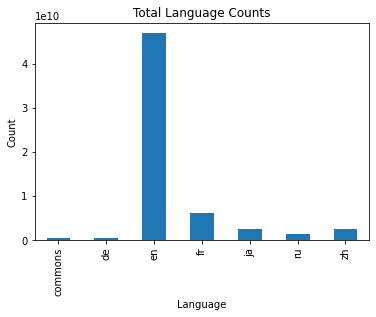

In [117]:
import matplotlib.pyplot as plt

# get the sum of language counts for each column
lang_cols = lang_df.columns
counts = lang_df[lang_cols].sum()

# create a bar plot
fig, ax = plt.subplots()
counts.plot.bar(ax=ax)

# set the plot title and axis labels
ax.set_title('Total Language Counts')
ax.set_xlabel('Language')
ax.set_ylabel('Count')

# display the plot
plt.show()


In [118]:
lang_pages = df.lang.value_counts()

<AxesSubplot:>

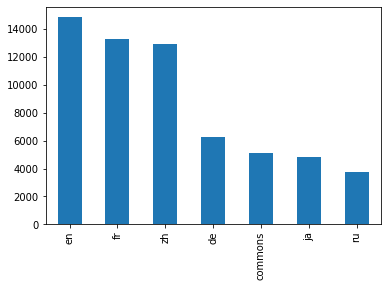

In [119]:
lang_pages.plot(kind='bar')

In [120]:
exog_df.set_index(lang_df.index,inplace=True)

In [121]:
#merged with Exog
merged_df = pd.merge(lang_df, exog_df, left_index=True, right_index=True)

In [122]:
merged_df

,commons,de,en,fr,ja,ru,zh,Exog
date,,,,,,,,
2015-07-01,579000.0,742302.0,66065222.0,8413729.0,3423822.0,1765720.0,3413909.0,0
2015-07-02,605257.0,698744.0,65829028.0,8479002.0,3326838.0,1776308.0,3454103.0,0
2015-07-03,593123.0,620556.0,61238929.0,8147993.0,3504746.0,1830215.0,3400769.0,0
2015-07-04,485204.0,492384.0,63041651.0,8710220.0,5200572.0,1954468.0,3336333.0,0
2015-07-05,548252.0,625341.0,65286726.0,8554550.0,4917657.0,2052188.0,3574716.0,0
...,...,...,...,...,...,...,...,...
2016-12-27,1178239.0,994183.0,113010917.0,14430822.0,4547138.0,2941859.0,5186111.0,1
2016-12-28,1322124.0,1031693.0,110388953.0,13608493.0,4473015.0,2746475.0,5240679.0,1
2016-12-29,1179010.0,1115784.0,115730191.0,13232659.0,5102968.0,2705237.0,4831297.0,1


In [123]:
#splitting for test and training data
train_x = merged_df.loc[lang_df.index < lang_df.index[-12]].copy()
test_x = merged_df.loc[lang_df.index >= lang_df.index[-12]].copy()

In [124]:
test_x

,commons,de,en,fr,ja,ru,zh,Exog
date,,,,,,,,
2016-12-20,1198442.0,995002.0,107451595.0,12949834.0,4395424.0,2895181.0,5060070.0,0
2016-12-21,1021828.0,884494.0,98127007.0,11883184.0,4139525.0,2769093.0,5171865.0,0
2016-12-22,1032957.0,808659.0,100172430.0,11438861.0,3973725.0,2754639.0,4738674.0,0
2016-12-23,1235962.0,715057.0,90826964.0,11210366.0,6660162.0,2792881.0,4672655.0,0
2016-12-24,1027205.0,532322.0,94345332.0,10768120.0,5631341.0,3063083.0,4825119.0,0
2016-12-25,1235548.0,1356079.0,95166578.0,11618007.0,5356404.0,3875674.0,5080657.0,0
2016-12-26,1357299.0,769646.0,107480520.0,15363677.0,4546267.0,3514790.0,5116428.0,0
2016-12-27,1178239.0,994183.0,113010917.0,14430822.0,4547138.0,2941859.0,5186111.0,1
2016-12-28,1322124.0,1031693.0,110388953.0,13608493.0,4473015.0,2746475.0,5240679.0,1


In [125]:
lang_df = train_x

In [126]:
lang_df.shape

(538, 8)

In [127]:
lang_df.en.isna().sum()

0

In [128]:
import statsmodels.api as sm

#### Dickey-Fuller test

In [129]:
sm.tsa.stattools.adfuller(lang_df.en)[1]

0.14539882179746394

In [130]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1] 
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

adf_test(lang_df.en)

Sequence is not stationary


#### Decomposition of series.

<AxesSubplot:xlabel='date'>

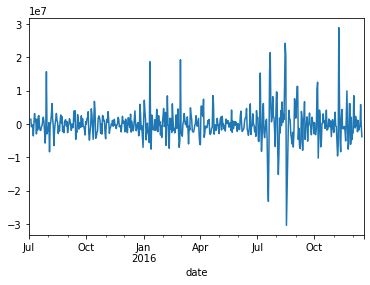

In [131]:
model = sm.tsa.seasonal_decompose(lang_df.en, model='additive')
model.resid.plot()

In [132]:
adf_test(model.resid.dropna())

Sequence is stationary


<AxesSubplot:xlabel='date'>

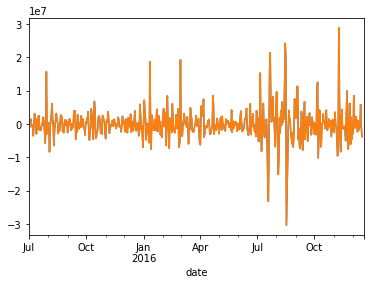

In [133]:
model = sm.tsa.seasonal_decompose(lang_df.en, model='additive')
model.resid.plot()
model = sm.tsa.seasonal_decompose(lang_df.en.dropna(), model='additive')
model.resid.plot()

#### Differencing the series.

<AxesSubplot:xlabel='date'>

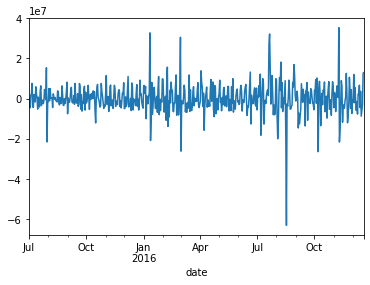

In [134]:
lang_df.en.diff().plot()

In [135]:
adf_test(lang_df.en.diff().dropna())

Sequence is stationary


#### PACF/ACF

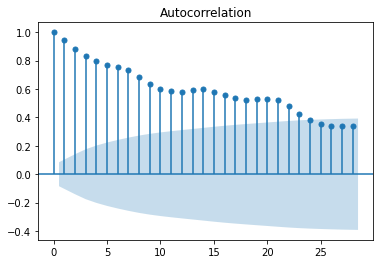

In [136]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(lang_df.en);

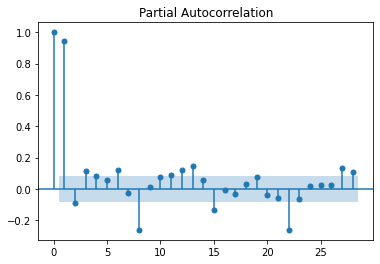

In [137]:
plot_pacf(lang_df.en);

<AxesSubplot:xlabel='date'>

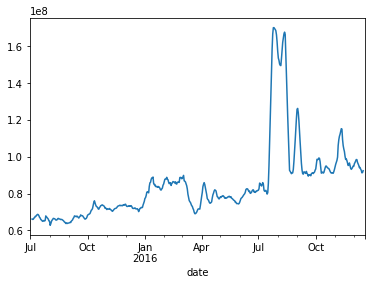

In [138]:
model.trend.plot()

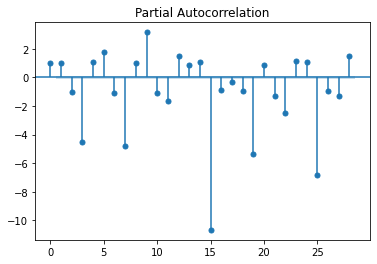

In [139]:
plot_pacf(model.trend.dropna());

<AxesSubplot:xlabel='date'>

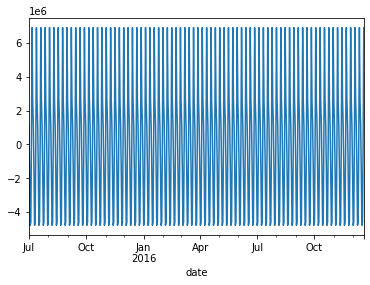

In [140]:
model.seasonal.plot()

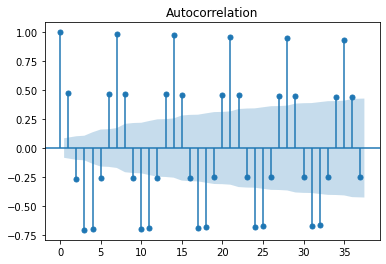

In [141]:
plot_acf(model.seasonal.dropna(), lags=37);

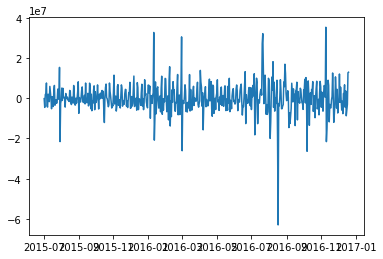

In [142]:
plt.plot(lang_df.en.diff())

<AxesSubplot:xlabel='date'>

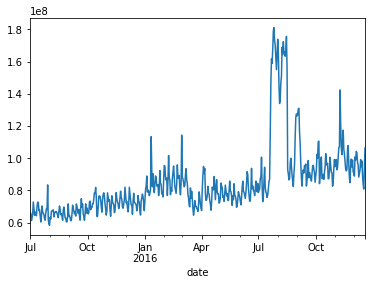

In [143]:
lang_df.en.plot()

In [144]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

In [145]:
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

In [146]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [147]:
model_test_x = pd.DataFrame()

In [148]:
def predict_lang_arima(lang):    
    d = 1
    min_p,min_q = 0,0
    min_mape = 101
    for p in [1,2,3,7]:
        for q in [1,2,7,12]:
            model = SARIMAX(lang_df[lang], order=(p,d,q)) 
            model = model.fit(disp=False)
            test_x['pred_'+lang] = model.forecast(steps=12)
#             test_x[['en','pred_'+lang]].plot(style='-o')
#             performance(test_x['pred_'+lang], test_x['en'])
            curr_mape = mape(test_x['pred_'+lang], test_x[lang])
            if curr_mape < min_mape:
                min_p,min_q,min_mape = p,q,curr_mape
    return p,q,min_mape
        


#### Arima for all Languages

In [149]:
warnings.filterwarnings("ignore")

commons : (7, 12, 0.07471867409460274)
de : (7, 12, 0.20061822535545185)
en : (7, 12, 0.054204611279428445)
fr : (7, 12, 0.10239766037754583)
ja : (7, 12, 0.15559213608189035)
ru : (7, 12, 0.07673013689420254)
zh : (7, 12, 0.031518576387050364)
----Errors for language commons----
MAE : 99906.205
RMSE : 119410.004
MAPE: 0.084
----Errors for language de----
MAE : 207255.572
RMSE : 230727.439
MAPE: 0.212
----Errors for language en----
MAE : 5498526.358
RMSE : 7132532.98
MAPE: 0.055
----Errors for language fr----
MAE : 1367350.905
RMSE : 1556053.707
MAPE: 0.102
----Errors for language ja----
MAE : 848225.96
RMSE : 1333189.704
MAPE: 0.178
----Errors for language ru----
MAE : 236731.045
RMSE : 295361.231
MAPE: 0.077
----Errors for language zh----
MAE : 159187.96
RMSE : 201118.403
MAPE: 0.032


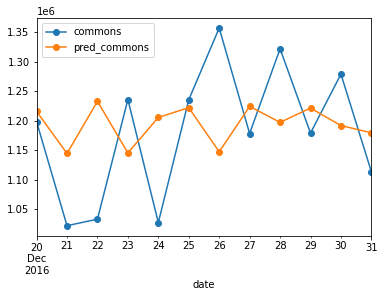

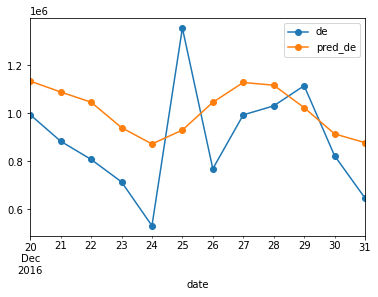

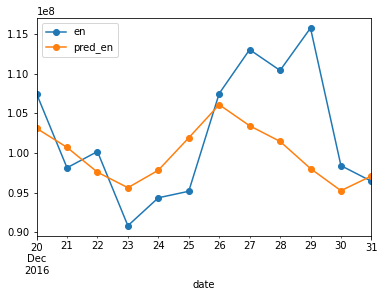

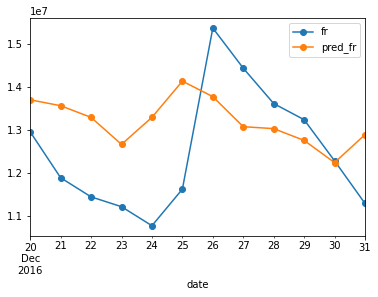

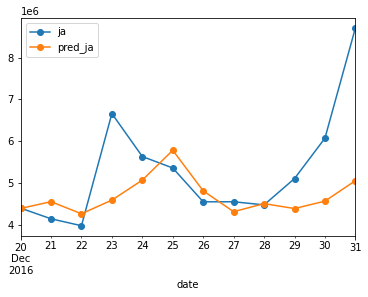

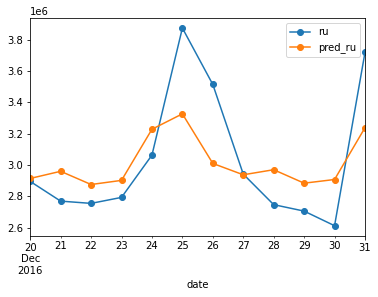

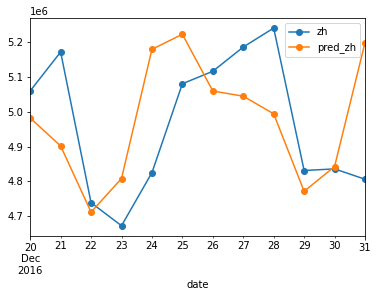

In [150]:
languages = list(lang_df.columns[:-1]) #All Languages

parameters_dict = {}

for i in languages:
    parameters_dict[i] = predict_lang_arima(i)
for key in parameters_dict.keys():
    print('{} : {}'.format(key , parameters_dict[key]))#Parameters for all languages of p,q and MAPE

for i in languages:
    model = SARIMAX(lang_df[i], order=(parameters_dict[i][0], 1, parameters_dict[i][1]))
    model = model.fit(disp=False)
    print('----Errors for language {}----'.format(i))
    test_x['pred_'+i] = model.forecast(steps=12)

    test_x[[i,'pred_'+i]].plot(style='-o')

    performance(test_x['pred_'+i], test_x[i])

#### SARIMAX

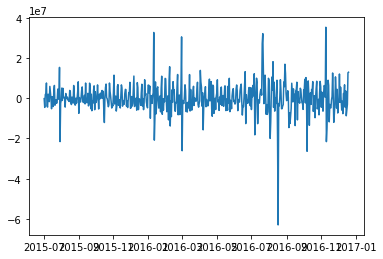

In [151]:
# plt.figure(figsize=(20,10))
plt.plot(lang_df['en'].diff())

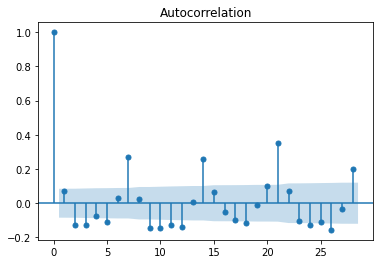

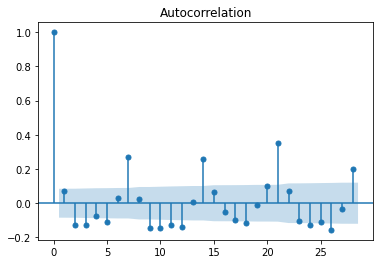

In [152]:
plot_acf(lang_df['en'].diff().dropna())

In [153]:
# plot_acf(lang_df['en'])

MAE : 4939798.152
RMSE : 6313157.498
MAPE: 0.049


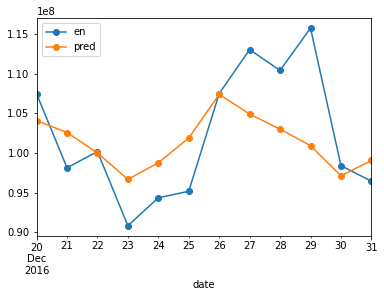

In [154]:
model = SARIMAX(lang_df.en, order=(3,1,3), seasonal_order=(3, 0, 1, 7)) 
model = model.fit(disp=False)


test_x['pred'] = model.forecast(steps=12)

test_x[['en','pred']].plot(style='-o')

performance(test_x['pred'], test_x['en'])

In [155]:
lang_df.en.shape

(538,)

In [156]:
lang_df.head()

,commons,de,en,fr,ja,ru,zh,Exog
date,,,,,,,,
2015-07-01,579000.0,742302.0,66065222.0,8413729.0,3423822.0,1765720.0,3413909.0,0
2015-07-02,605257.0,698744.0,65829028.0,8479002.0,3326838.0,1776308.0,3454103.0,0
2015-07-03,593123.0,620556.0,61238929.0,8147993.0,3504746.0,1830215.0,3400769.0,0
2015-07-04,485204.0,492384.0,63041651.0,8710220.0,5200572.0,1954468.0,3336333.0,0
2015-07-05,548252.0,625341.0,65286726.0,8554550.0,4917657.0,2052188.0,3574716.0,0


In [157]:
model = SARIMAX(lang_df['en'], exog=lang_df['Exog'], order=(1,1,1),seasonal_order=(3,0,2,7))
results = model.fit(disp=False)

exog_forecast = test_x[['Exog']]
predictions = results.predict(start=test_x.index[0], end=test_x.index[-1], exog=exog_forecast).rename('Predictions')

MAE : 5619085.829
RMSE : 7191446.18
MAPE: 0.054


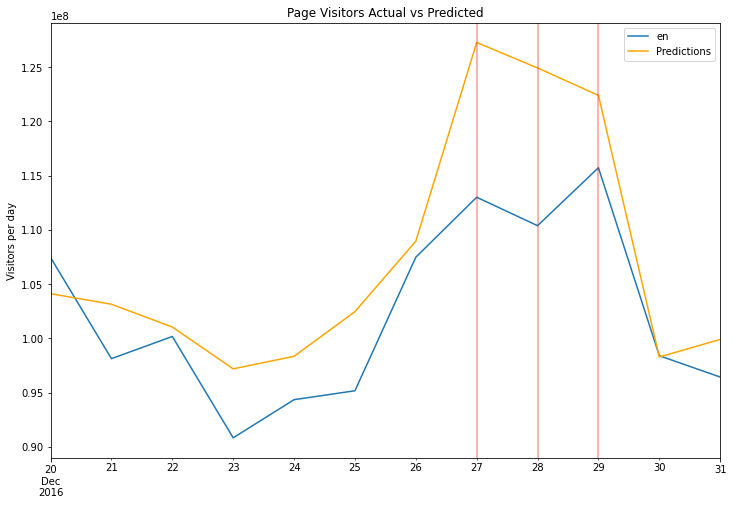

In [158]:
performance(test_x['en'], predictions)
# Plot predictions against known values
title='Page Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = test_x['en'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test_x.query('Exog==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.4);

### Prophet

In [159]:
from prophet import Prophet

In [162]:
df = pd.DataFrame()
df['ds'] = pd.DataFrame(lang_df.index)

In [163]:
lang_df.index

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10',
               ...
               '2016-12-10', '2016-12-11', '2016-12-12', '2016-12-13',
               '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-17',
               '2016-12-18', '2016-12-19'],
              dtype='datetime64[ns]', name='date', length=538, freq=None)

In [164]:
df['y'] = lang_df['en']

df.head()

,ds,y
0,2015-07-01,NaN
1,2015-07-02,NaN
2,2015-07-03,NaN
3,2015-07-04,NaN
4,2015-07-05,NaN


In [165]:
lang_df['en']

date
2015-07-01     66065222.0
2015-07-02     65829028.0
2015-07-03     61238929.0
2015-07-04     63041651.0
2015-07-05     65286726.0
                 ...     
2016-12-15     89581082.0
2016-12-16     83900097.0
2016-12-17     80833611.0
2016-12-18     93438972.0
2016-12-19    106338647.0
Name: en, Length: 538, dtype: float64

In [166]:
df['ds'] = pd.to_datetime(lang_df.index)

In [167]:
df['y'] = lang_df.en

In [168]:
lang_df.en.head()

date
2015-07-01    66065222.0
2015-07-02    65829028.0
2015-07-03    61238929.0
2015-07-04    63041651.0
2015-07-05    65286726.0
Name: en, dtype: float64

In [169]:
p_merged_df = pd.merge(df, lang_df, left_on='ds',right_on = 'date')
p_merged_df.head()

,ds,y,commons,de,en,fr,ja,ru,zh,Exog
0,2015-07-01,NaN,579000.0,742302.0,66065222.0,8413729.0,3423822.0,1765720.0,3413909.0,0
1,2015-07-02,NaN,605257.0,698744.0,65829028.0,8479002.0,3326838.0,1776308.0,3454103.0,0
2,2015-07-03,NaN,593123.0,620556.0,61238929.0,8147993.0,3504746.0,1830215.0,3400769.0,0
3,2015-07-04,NaN,485204.0,492384.0,63041651.0,8710220.0,5200572.0,1954468.0,3336333.0,0
4,2015-07-05,NaN,548252.0,625341.0,65286726.0,8554550.0,4917657.0,2052188.0,3574716.0,0


In [170]:
df = p_merged_df[['ds','en','Exog']]

In [171]:
df.rename(columns={'en':'y','Exog':'holiday'},inplace=True)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp469jh7ll/ucsz8iyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp469jh7ll/u5ba5il7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12063', 'data', 'file=/tmp/tmp469jh7ll/ucsz8iyu.json', 'init=/tmp/tmp469jh7ll/u5ba5il7.json', 'output', 'file=/tmp/tmp469jh7ll/prophet_modelvjytp_eu/prophet_model-20230226185546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


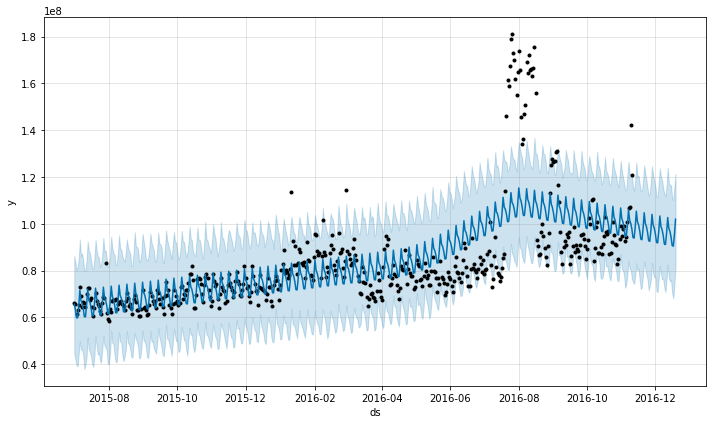

In [172]:
m = Prophet()
m.fit(df[['ds', 'y']][:-39])
future = m.make_future_dataframe(periods=39, freq='D')
forecast = m.predict(future)
m.plot(forecast);

In [173]:
f = forecast.tail(70)
f.set_index('ds', inplace=True)

<AxesSubplot:xlabel='ds'>

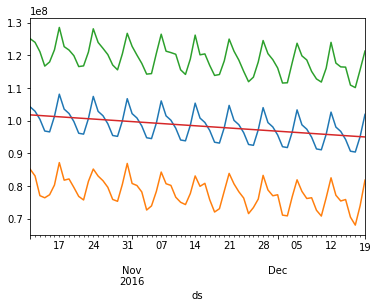

In [174]:
f.yhat.plot()
f.yhat_lower.plot()
f.yhat_upper.plot()
f.trend.plot()

In [175]:
performance(df['y'][:-39],forecast['yhat'][:-39])

MAE : 9937098.815
RMSE : 16001870.17
MAPE: 0.103


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp469jh7ll/_nztnapq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp469jh7ll/hpb6rrlk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84966', 'data', 'file=/tmp/tmp469jh7ll/_nztnapq.json', 'init=/tmp/tmp469jh7ll/hpb6rrlk.json', 'output', 'file=/tmp/tmp469jh7ll/prophet_modelpzqqp05m/prophet_model-20230226185547.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:55:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:55:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


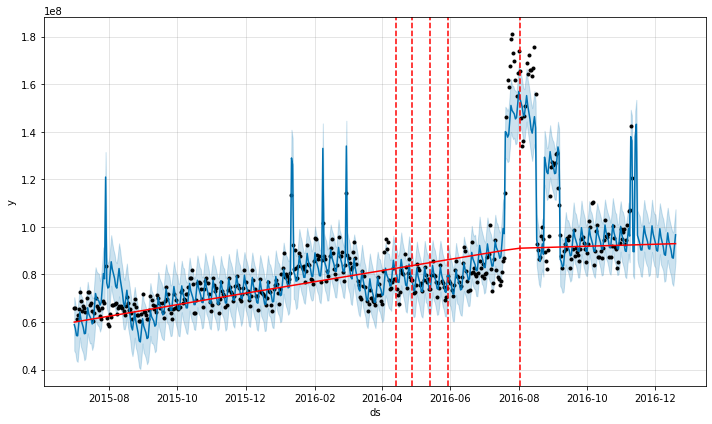

In [176]:
from prophet.plot import add_changepoints_to_plot

model2=Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday') #adding holidays data in the model3
model2.fit(df[:-39])
forecast2 = model2.predict(df)
fig = model2.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m, forecast2)

In [177]:
performance(df['y'][:-39],forecast2['yhat'][:-39])

MAE : 5419074.039
RMSE : 8515797.247
MAPE: 0.062


1) Defining the problem statements and where can this and modifications of this be used?
--To Predict the page visitors for specific languages

2) Write 3 inferences you made from the data visualizations
--English language pages have more number of visitors
  English has more number of pages
  Eventhough all the languages have almost same number of pages english language pages are more popualar
  

3) What does the decomposition of series do?
-- Decomposition seperates the series into trend,seasonality and error 

4) What level of differencing gave you a stationary series?
-- 1st level of differencing gave a stationary series
Difference between arima, sarima & sarimax.

5) Compare the number of views in different languages
--English language pages have more number of visitors.

6) What other methods other than grid search would be suitable to get the model for all languages?
-- we can make use of random search manually.

7) Difference between arima, sarima & sarimax.
-- arima is used for stationary series
   sarima is to incorporate the effect of seasonality
   sarimax is used to add the effect of external factor in the timeseries